# Tách ảnh xám từ ảnh màu và ngược lại, kết hợp các channel màu để tạo ảnh màu từ các ảnh xám

---



## Mô hình màu sắc RGB


Trong mô hình RGB (Red Green Blue), mỗi màu xuất hiện trong thành phần phổ màu chính (primary spectral components) của nó. Mô hình này dựa trên hệ trục toạ độ Đề các. Không gian con của màu sắc được thể hiện là một khối lập phương như hình minh hoạ sau:

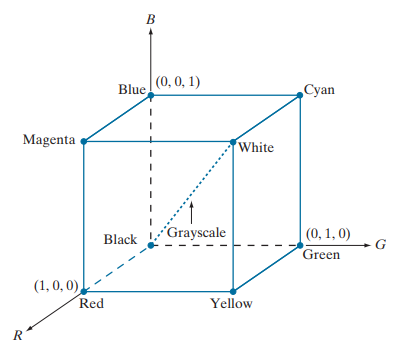
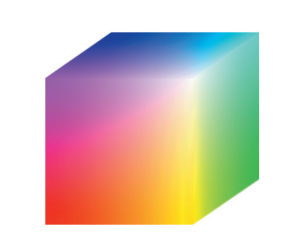

Trong đó, các giá trị RGB chính (primary RGB) nằm tại ba góc (1,0,0) - red, (0,0,1) - blue, (0,1,0) - green; các màu thứ cấp là Cyan, Magenta, Yellow nằm ở ba góc khác; màu đen nằm tại góc toạ độ; màu trắng nằm ở góc xa gốc toạ độ nhất.Trong mô hình này, thang đo độ xám (các điểm có cùng giá trị RGB) được trải dài từ điểm đen đến điểm trắng trong đoạn thẳng nối dài 2 điểm này.

Các màu sắc kháu nhau trong mô hình này được biểu diễn bằng một điểm nằm trên/trong khối lập phương, và được định nghĩa bởi một vector được bắt đầu từ gốc toạ độ. Tất cả giá trị của R, G, và B được biểu diễn trên được giả sử nằm trong khoảng [0,1]

Hình ảnh được biểu diễn trong mô hình RGB bao gồm 3 hình ảnh thành phần, mỗi hình ảnh đại diện cho một màu cơ bản (color channel). Khi được đưa vào màn hình RGB, ba hình ảnh này kết hợp trên màn hình để tạo ra hình ảnh màu tổng hợp. Số bit được sử dụng để biểu thị từng pixel trong không gian RGB được gọi là độ sâu pixel (*pixel depth*). Hãy xem xét một hình ảnh RGB trong đó mỗi thành phần màu red, green và blue là một bộ 8 bit (8-bit image). Trong các điều kiện này, mỗi pixel màu RGB [nghĩa là bộ ba giá trị (R, G, B)] có độ sâu 24 bit (3 mặt phẳng hình ảnh nhân với số bit trên mỗi mặt phẳng). Thuật ngữ hình ảnh đủ màu (*full-color image*) thường được sử dụng để biểu thị hình ảnh màu RGB 24 bit.

## Basics of full-color image processing


Các cách tiếp cận xử lý ảnh màu đầy đủ rơi vào 2 loại chính:
- Xử mỗi thành phần ảnh xám (grayscale component image) riêng biệt, sau đó tạo thành một hình ảnh màu tổng hợp từ các thành phần được xử lý riêng lẻ.
- Xử lý trực tiếp với các pixel màu sắc

Vì hình ảnh màu đầy đủ có ít nhất ba thành phần nên các pixel màu là vectơ. Ví dụ: trong hệ RGB, mỗi điểm màu có thể được hiểu là một vectơ kéo dài từ điểm gốc đến điểm đó trong hệ tọa độ RGB.

Cho $\textbf{c}$ là một vector ngẫu nhiên trong không gian màu RGB: $$\mathbf{c} = \begin{bmatrix} c_R \\ c_G \\ c_B \end{bmatrix} = \begin{bmatrix} R \\ G \\ B \end{bmatrix}$$.
Phương trình này chỉ ra rằng các thành phần của $\mathbf{c}$ là các thành phần RGB của một ảnh màu tại một điểm ảnh. Thực tế là màu sắc của các pixel trong ảnh là hàm của tọa độ không gian ($x,y$): $$
\mathbf{c}(x, y)=\left[\begin{array}{l}
c_R(x, y) \\
c_G(x, y) \\
c_B(x, y)
\end{array}\right]=\left[\begin{array}{l}
R(x, y) \\
G(x, y) \\
B(x, y)
\end{array}\right]
$$


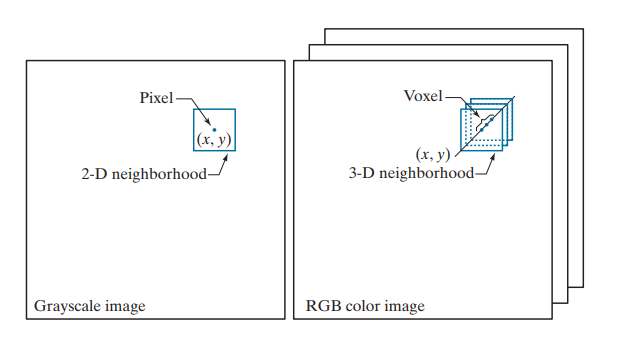

# Chuyển đổi từ ảnh màu sang ảnh xám

## Hiện thực

Thêm các thư viện cần thiết

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Load các hình ảnh vào bằng thư viện matplotlib và kiểm tra thông tin của ảnh.

In [60]:
image = plt.imread('./cambridge/043.jpg')
print(f'image shape: {image.shape}')
print(f'image type: {image.dtype}')

image shape: (616, 816, 3)
image type: uint8


Có thể thấy, bức ảnh là một np.ndarray có kích thước 512x512 là độ dài rộng theo pixel và có 3 kênh màu. Ngoài ra, khi kiểm tra dtype của hình ảnh, nhận được kết quả là unit8 chứng tỏ đây là một bức ảnh màu 8-bit.

In [61]:
def showImage(image,cmap=None):
  plt.figure()
  plt.imshow(image) if cmap is None else plt.imshow(image,cmap='gray')
  plt.show()

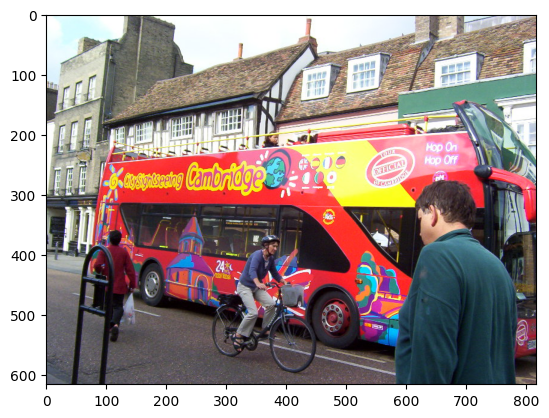

In [62]:
showImage(image)

Ta có 3 phương pháp để tách ảnh xám từ ảnh màu:
1. Lightness method: lấy giá trị trung bình của các thành phần có giá trị cao nhất và thấp nhất $$grayscale = \frac{max(RGB) + min(RGB)}{2}$$
2. Average method: Chỉ đơn giản là lấy trung bình cả 3 thành phần RGB $$grayscale = \frac{R+G+B}{3}$$
3. Luminosity Method: Sử dụng các tỉ lệ khác nhau cho từng thành phần RGB để phù hợp với mắt người. Ở BTL này sẽ sử dụng công thức [NTSC](https://en.wikipedia.org/wiki/NTSC) $$grayscale = 0.299*R + 0.587*G + 0.114*B$$

### Lightness method

In [63]:
lightness_method_img = np.max(image,axis=-1,keepdims=1)/2 + np.min(image,axis=-1,keepdims=1)/2

### Average method

In [64]:
average_method_img = np.sum(image, axis=-1)/3

### Luminosity method

In [65]:
luminosity_method_img = 0.3*image[:,:,0] + 0.59*image[:,:,1] + 0.11*image[:,:,2]

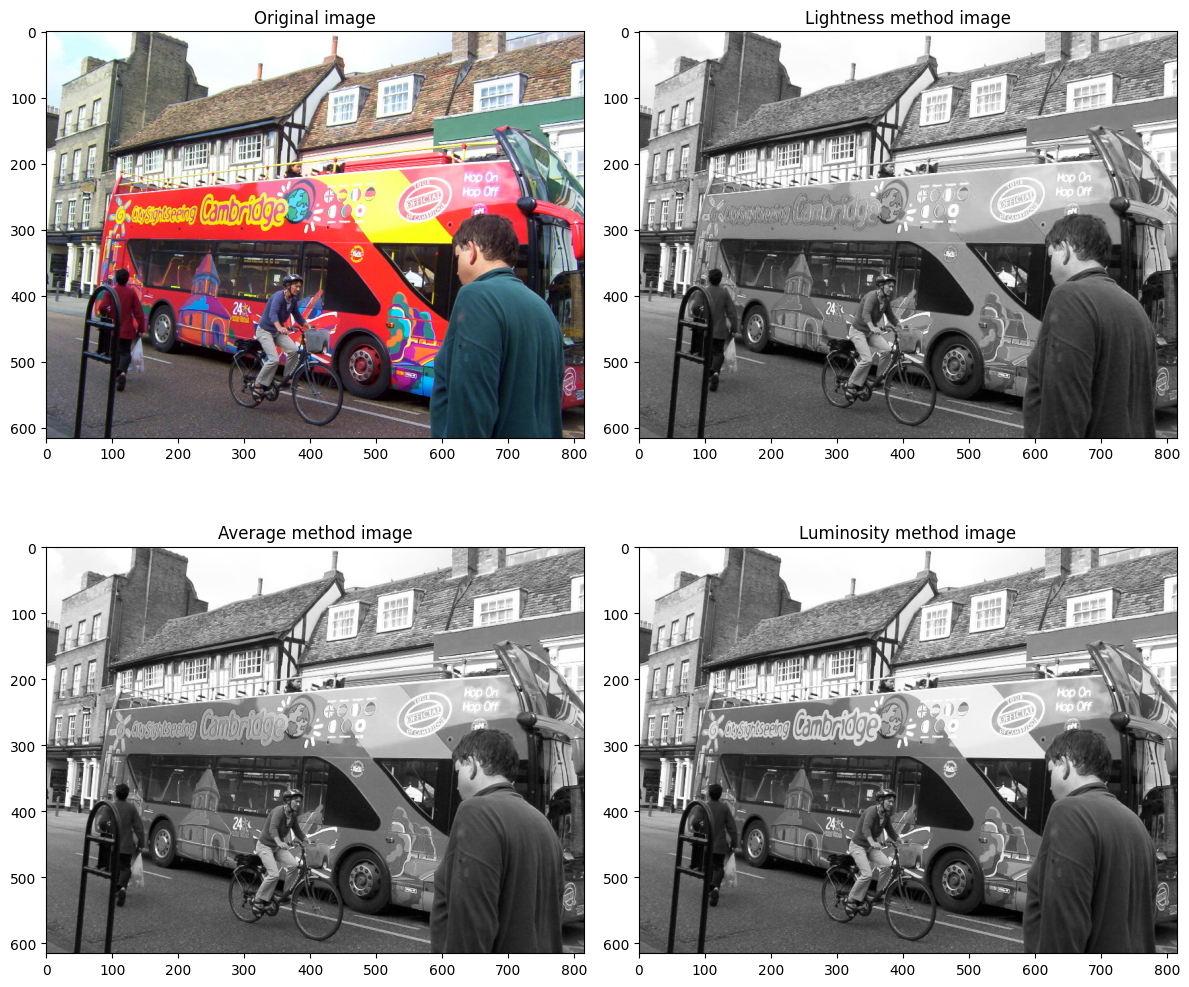

In [66]:
fig,ax = plt.subplots(2,2,figsize=(12,12), layout='tight')
ax[0,0].imshow(image)
ax[0,0].set_title('Original image')
ax[0,1].imshow(lightness_method_img,cmap='gray')
ax[0,1].set_title('Lightness method image')
ax[1,0].imshow(average_method_img, cmap='gray')
ax[1,0].set_title('Average method image')
ax[1,1].imshow(luminosity_method_img, cmap='gray')
ax[1,1].set_title('Luminosity method image')
fig.show()

## Nhận xét


Các kết quả có sự khác nhau về thể hiện độ sáng/tối (dễ thấy nhất ở đoạn chữ "Cambridge" trên xe). Ở phương pháp lightness thì thể hiện không rõ nhất, rồi đến phương pháp average, vì mắt người nhận diện các màu sắc khác nhau mà phương pháp này thì gán trọng số bằng nhau cho các màu nên độ sáng/tối ở phương pháp này sẽ không tốt bằng phương pháp luminosity, phương pháp này gán các trọng số khác nhau cho từng thành phần màu vì mắt người thì nhạy cảm hơn với màu green, rồi tới red, và cuối cùng là blue.

# Kết hợp các channel màu để tạo ảnh màu từ các ảnh xám

Vì không có dataset về ảnh với riêng biệt về các channel nên ở bài này, ta cần tách ra 3 ảnh tương ứng với 3 channel của một ảnh màu để dễ kiểm chứng kết quả.

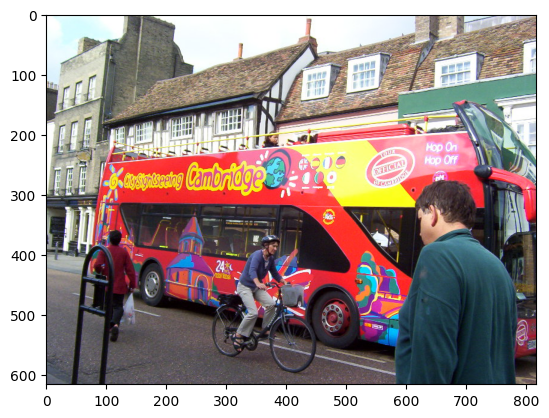

In [67]:
origin_color_image = plt.imread('./cambridge/043.jpg')
showImage(origin_color_image)

Bản chất của ảnh màu là chồng (stack) các ảnh với các channel khác nhau.

In [68]:
R_channel_image = origin_color_image[:,:,0]   # keep only Red channel
G_channel_image = origin_color_image[:,:,1]   # keep only Green channel
B_channel_image = origin_color_image[:,:,2]   # keep only Blue channel
print(f'R_channel_image.shape: {R_channel_image.shape}')
print(f'G_channel_image.shape: {G_channel_image.shape}')
print(f'B_channel_image.shape: {B_channel_image.shape}')

R_channel_image.shape: (616, 816)
G_channel_image.shape: (616, 816)
B_channel_image.shape: (616, 816)


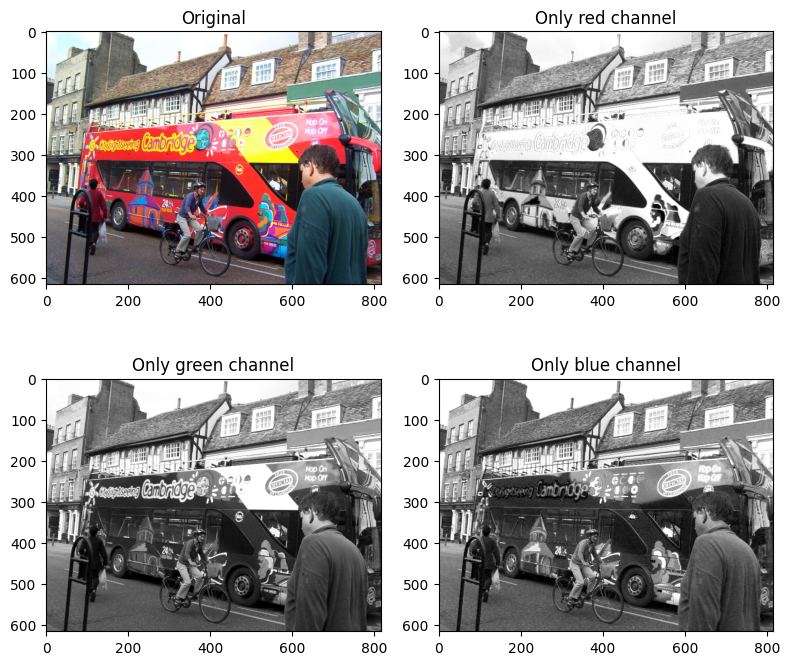

In [71]:
fig, axs = plt.subplots(2,2, layout='tight', figsize=(8,8))
axs[0,0].imshow(origin_color_image)
axs[0,0].set_title('Original')
axs[0,1].imshow(R_channel_image,cmap='gray')
axs[0,1].set_title('Only red channel')
axs[1,0].imshow(G_channel_image,cmap='gray')
axs[1,0].set_title('Only green channel')
axs[1,1].imshow(B_channel_image,cmap='gray')
axs[1,1].set_title('Only blue channel')
fig.show()

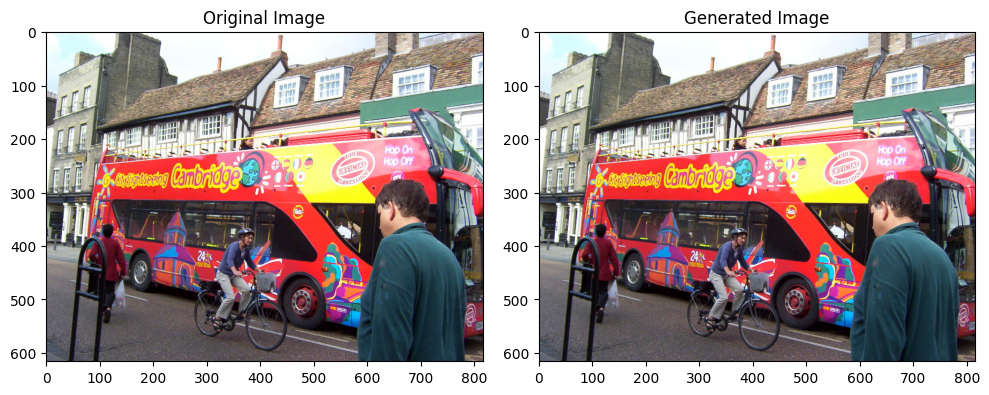

In [70]:
generated_color_image = np.stack([R_channel_image,G_channel_image,B_channel_image],axis=-1)
fig, axs = plt.subplots(1,2, figsize=(10,10),layout='tight')
axs[0].imshow(origin_color_image)
axs[0].set_title('Original Image')
axs[1].imshow(generated_color_image)
axs[1].set_title('Generated Image')
fig.show()